In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from utils.black_scholes import raiz_ratio, d1_ratio, call_price_ratio
from utils.biseccion import bisec
import math
import scipy.stats as st
from utils.sample import Sample
import pandas as pd

def f(x):
    return raiz_ratio(c, ratio, r, x, T)


In [26]:
## Para crear muestra

obj = Sample(ratio=[0.4, 1.6], T=[0.2,1.1], r=[0.02, 0.1], o=[0.01, 1])
obj.create('my_muestra', 10**5)

my_muestra is done ...


In [27]:
#abro my muestra
obj = Sample()
x, y = obj.open('my_muestra')

In [28]:
df = pd.DataFrame(x, columns=['c/k', 'ratio', 'r', 'T'])

In [29]:
df['o'] = y
df

,c/k,ratio,r,T,o
0,7.602448e-01,1.579541,0.033574,0.934851,0.807247
1,2.970051e-01,1.259227,0.084983,0.449574,0.164316
2,2.932463e-01,1.275900,0.077232,0.226578,0.073695
3,3.138043e-02,0.786170,0.053695,0.515945,0.389865
4,1.863845e-02,0.669302,0.054979,0.449029,0.509719
...,...,...,...,...,...
99995,3.443691e-01,1.146897,0.049544,0.818303,0.640608
99996,4.728045e-02,0.786605,0.071432,0.757240,0.365977
99997,6.941807e-01,1.589146,0.027279,0.911860,0.613130
99998,2.612219e-01,1.240706,0.099283,0.208793,0.022805


In [30]:
def my_f(e):
    return raiz_ratio(e['c/k'], e['ratio'], e['r'], 0.01, e['T'])

def norm_1(e, o=0.01):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], o, e['T']))

def norm_2(e, o=0.01):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], o, e['T'])- o*math.sqrt(e['T']))

In [31]:
def norm1p(e):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], e['o'], e['T']))


def norm2p(e):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], e['o'], e['T'])- e['o']*math.sqrt(e['T']))

In [32]:
#tarda tiempo, agregar norm 1 y norm 2
df['f(0.01)'] = df.apply(my_f, axis=1)
df['norm1'] = df.apply(norm_1, axis=1) #es la normal de la volatilidad == 0.01
df['norm2'] = df.apply(norm_1, axis=1) #es la normal de la volatilidad == 0.01
df['norm1p'] = df.apply(norm1p, axis=1) #es la normal de la volatilidad implícita
df['norm2p'] = df.apply(norm2p, axis=1) #es la normal de la volatilidad implícita

In [33]:
df.head(5)

,c/k,ratio,r,T,o,f(0.01),norm1,norm2,norm1p,norm2p
0,0.760245,1.579541,0.033574,0.934851,0.807247,-1.498039e-01,1.000000e+00,1.000000e+00,0.845222,0.593147
1,0.297005,1.259227,0.084983,0.449574,0.164316,-2.929126e-04,1.000000e+00,1.000000e+00,0.993684,0.991433
2,0.293246,1.275900,0.077232,0.226578,0.073695,-3.330669e-16,1.000000e+00,1.000000e+00,1.000000,1.000000
3,0.031380,0.786170,0.053695,0.515945,0.389865,-3.138043e-02,2.795564e-193,2.795564e-193,0.267576,0.184007
4,0.018638,0.669302,0.054979,0.449029,0.509719,-1.863845e-02,0.000000e+00,0.000000e+00,0.175543,0.101323


In [34]:
#casos en los que no puedo aplicar el método de bisección
casos_de_mandinga = df[df['f(0.01)'] > 0]
len(df[((df['norm1'] == 1) & (df['norm2'] == 1)) |
       ((df['norm1'] == 0) & (df['norm2'] == 0))])
len(casos_de_mandinga)

52

In [35]:
# minimo y maximo de la normal calculada con la volatilidad implícita
# muy cercanos a 1
(casos_de_mandinga['norm1p'].min(), casos_de_mandinga['norm1p'].max()) 

(0.999999999999992, 0.9999999999999999)

In [36]:
#Caso en particular con ratio
e = casos_de_mandinga.iloc[0]
o_posta = e['o']

def f(e, x):
    return raiz_ratio(e['c/k'], e['ratio'], e['r'], x, e['T'])

o = np.sort(np.append(np.linspace(0.01, 1, 100), np.array([o_posta])))
print(o)


[0.01      0.02      0.03      0.04      0.05      0.06      0.0610801
 0.07      0.08      0.09      0.1       0.11      0.12      0.13
 0.14      0.15      0.16      0.17      0.18      0.19      0.2
 0.21      0.22      0.23      0.24      0.25      0.26      0.27
 0.28      0.29      0.3       0.31      0.32      0.33      0.34
 0.35      0.36      0.37      0.38      0.39      0.4       0.41
 0.42      0.43      0.44      0.45      0.46      0.47      0.48
 0.49      0.5       0.51      0.52      0.53      0.54      0.55
 0.56      0.57      0.58      0.59      0.6       0.61      0.62
 0.63      0.64      0.65      0.66      0.67      0.68      0.69
 0.7       0.71      0.72      0.73      0.74      0.75      0.76
 0.77      0.78      0.79      0.8       0.81      0.82      0.83
 0.84      0.85      0.86      0.87      0.88      0.89      0.9
 0.91      0.92      0.93      0.94      0.95      0.96      0.97
 0.98      0.99      1.       ]


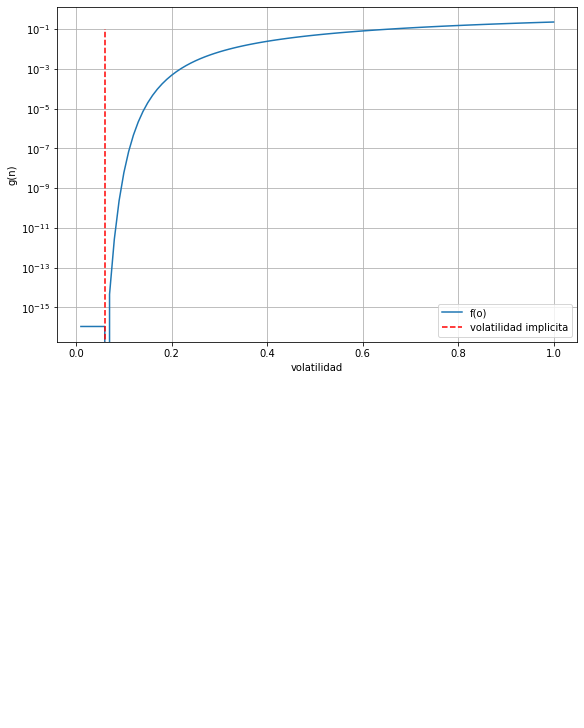

In [37]:
# grafico en funcion de f
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(o, [f(e, i) for i in o], label = 'f(o)')
ax.plot([o_posta]*2, np.linspace(0,0.1,2), 'r--', label = 'volatilidad implicita')
ax.set_xlabel('volatilidad')
ax.set_ylabel('g(n)')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.grid()



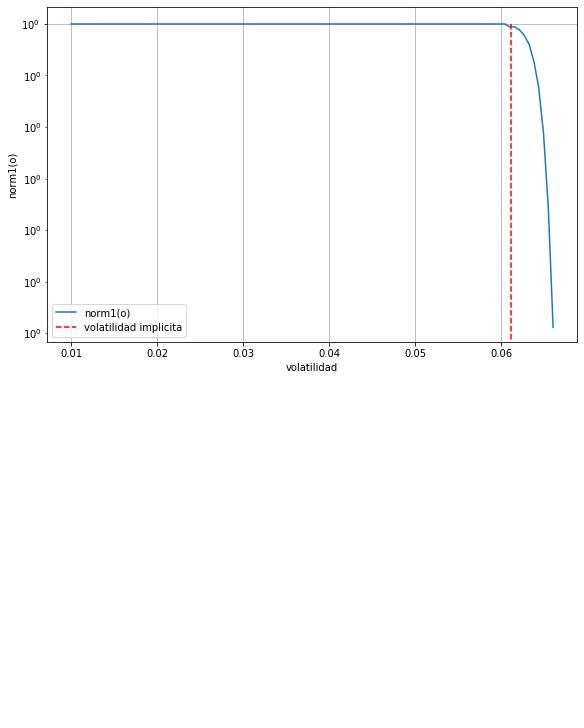

In [38]:
#grafico en funcion de norm1
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
aux = np.linspace(0.01, round(o_posta+0.005, 3), 101)
ax.plot(aux, [norm_1(e, o=i) for i in aux], label = 'norm1(o)')
ax.plot([o_posta]*2, np.linspace(0,1,2), 'r--', label = 'volatilidad implicita')
ax.set_xlabel('volatilidad')
ax.set_ylabel('norm1(o)')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.grid()


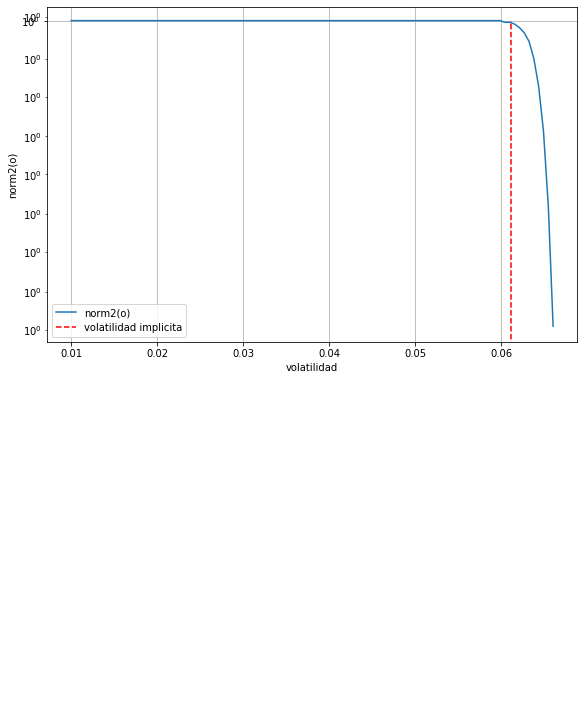

In [39]:
#grafico en funcion de norm2
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(aux, [norm_2(e, o=i) for i in aux], label = 'norm2(o)')
ax.plot([o_posta]*2, np.linspace(0,1,2), 'r--', label = 'volatilidad implicita')
ax.set_xlabel('volatilidad')
ax.set_ylabel('norm2(o)')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.grid()